# Popular Kernels Demonstration

This notebook demonstrates a support vector machine model for a non-linear classification problem using different popular kernels.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC

## Generate Sample Data

Generate random data for two classes using normal distributions.

In [2]:
# Set random seed for reproducibility.
np.random.seed(42)

# Generate data for two classes.
N_POINTS = 20
x_red = np.random.normal(loc=1, scale=0.75, size=(N_POINTS, 2))
x_blue = np.random.normal(loc=4, scale=0.75, size=(N_POINTS, 2))

# Combine the data.
X = np.vstack((x_red, x_blue))
y = np.hstack((np.zeros(N_POINTS), np.ones(N_POINTS)))

## Define Kernels and Parameters

Set up the different kernels to be compared in the visualization.

In [3]:
# Define the kernels to be used.
kernels = ["poly", "rbf", "sigmoid"]
titles = ["Polynomial Kernel", "RBF Kernel", "Sigmoid Kernel"]

## Compare Different Kernel Functions

Create a comparison visualization showing the decision boundaries for different SVM kernels.

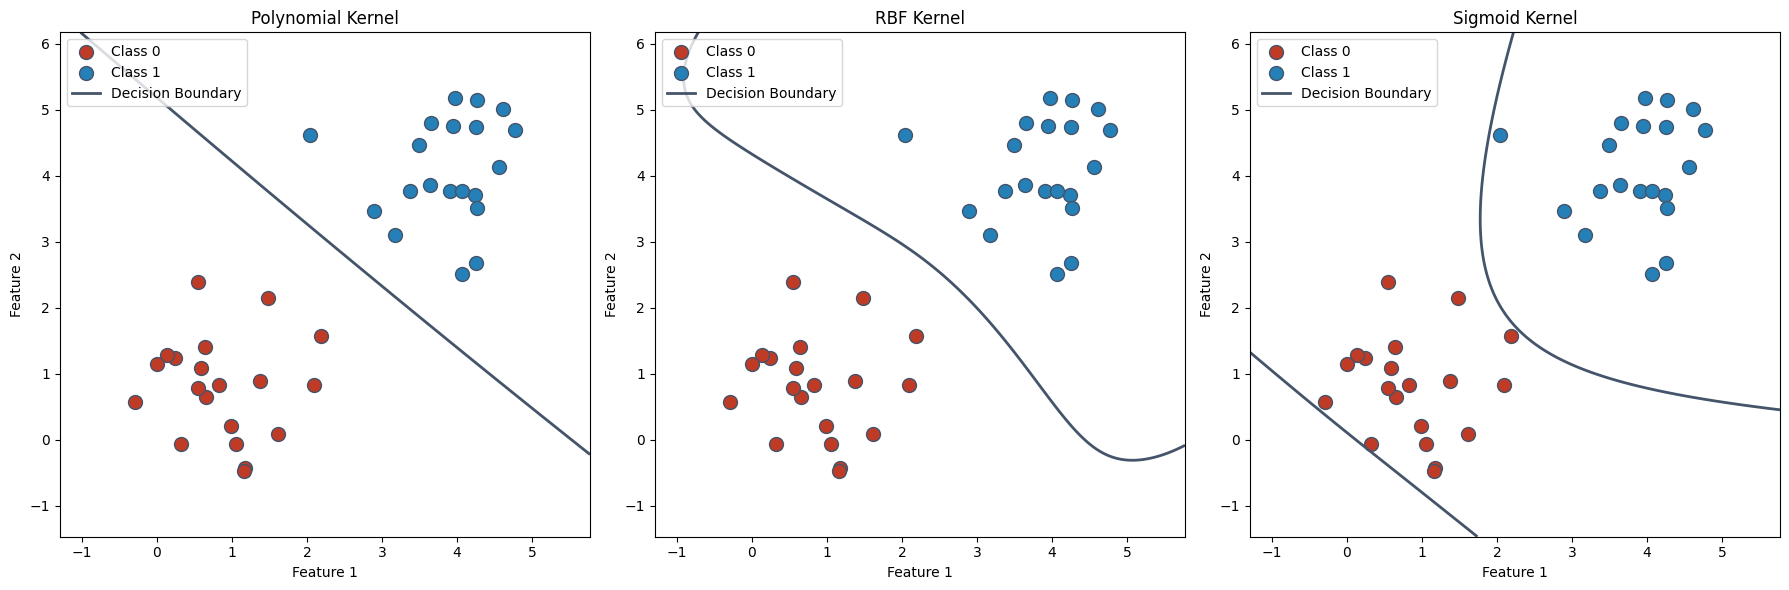

In [4]:
# Create a 1x3 subplot.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, kernel, title in zip(axes, kernels, titles):
    # Fit the SVM model.
    svm_model = SVC(kernel=kernel, C=1, gamma="auto")
    svm_model.fit(X, y)

    # Plot the 2D data.
    X_class_0 = X[y == 0]
    X_class_1 = X[y == 1]

    ax.scatter(
        X_class_0[:, 0], X_class_0[:, 1],
        color="#C03B26", s=100, edgecolor="#44546A", label="Class 0"
    )
    ax.scatter(
        X_class_1[:, 0], X_class_1[:, 1],
        color="#2580B7", s=100, edgecolor="#44546A", label="Class 1"
    )

    # Create a grid to plot the decision boundary.
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary.
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors="#44546A")
    ax.plot(
        [], [], color="#44546A", linestyle="-",
        linewidth=2, label="Decision Boundary"
    )

    # Add title and labels to each subplot.
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_xlim(x_red[:, 0].min() - 1, x_blue[:, 0].max() + 1)
    ax.set_ylim(x_red[:, 1].min() - 1, x_blue[:, 1].max() + 1)
    ax.legend(loc="upper left")

# Adjust layout.
plt.tight_layout()

# Show plot.
plt.show()